In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
os.mkdir('sports1')
os.makedirs('sports1\\train\\')
os.makedirs('sports1\\validation\\')


In [3]:
# Unzipping the file
import zipfile

local_zip = 'C:\\Users\\DX\\Desktop\\datascience\\MODULE 3\\assignment for correction\\Sports Image Dataset-20240402T143844Z-001.zip'
zipref = zipfile.ZipFile(local_zip, 'r')
zipref.extractall('sports1')
zipref.close()

In [4]:
sport_list = os.listdir('sports1')
sport_name = [file for file in sport_list if not (file.endswith('.txt') or file.endswith('.csv')or file.endswith('.pkl'))]
sport_name

['Sports Image Dataset', 'train', 'validation']

In [2]:
print(os.listdir('sports1\\train\\'))
print(os.listdir('sports1/validation\\'))

['badminton', 'baseball', 'basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe']
['badminton', 'baseball', 'basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe']


In [3]:
print(os.listdir('sports1/train/badminton')[:5])
print(os.listdir('sports1/validation/badminton')[:5])

['00000011.jpeg', '00000012.jpg', '00000013.jpg', '00000014.jpg', '00000016.jpg']
['00000011.jpeg', '00000012.jpg', '00000013.jpg', '00000014.jpg', '00000016.jpg']


In [34]:
base_dir = 'sports1'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

train_badminton_dir = os.path.join(train_dir, 'badminton')
train_baseball_dir = os.path.join(train_dir, 'baseball')
train_basketball_dir = os.path.join(train_dir, 'basketball')
train_boxing_dir = os.path.join(train_dir, 'boxing')
train_chess_dir = os.path.join(train_dir, 'chess')
train_cricket_dir = os.path.join(train_dir, 'cricket')
train_fencing_dir = os.path.join(train_dir, 'fencing')
train_football_dir = os.path.join(train_dir, 'football')
train_formula1_dir = os.path.join(train_dir, 'formula1')
train_gymnastics_dir = os.path.join(train_dir, 'gymnastics')
train_hockey_dir = os.path.join(train_dir, 'hockey')
train_icehockey_dir = os.path.join(train_dir, 'ice_hockey')
train_kabaddi_dir = os.path.join(train_dir, 'kabaddi')
train_motogp_dir = os.path.join(train_dir, 'motogp')
train_shooting_dir = os.path.join(train_dir, 'shooting')
train_swimming_dir = os.path.join(train_dir, 'swimming')
train_tennis_dir = os.path.join(train_dir, 'tennis')
train_tabletennis_dir = os.path.join(train_dir, 'table_tennis')
train_volleyball_dir = os.path.join(train_dir, 'volleyball')
train_weightlifting_dir = os.path.join(train_dir, 'weight_lifting')
train_wrestling_dir = os.path.join(train_dir, 'wrestling')
train_wwe_dir = os.path.join(train_dir, 'wwe')

val_badminton_dir = os.path.join(val_dir, 'badminton')
val_baseball_dir = os.path.join(val_dir, 'baseball')
val_basketball_dir = os.path.join(val_dir, 'basketball')
val_boxing_dir = os.path.join(val_dir, 'boxing')
val_chess_dir = os.path.join(val_dir, 'chess')
val_cricket_dir = os.path.join(val_dir, 'cricket')
val_fencing_dir = os.path.join(val_dir, 'fencing')
val_football_dir = os.path.join(val_dir, 'football')
val_formula1_dir = os.path.join(val_dir, 'formula1')
val_gymnastics_dir = os.path.join(val_dir, 'gymnastics')
val_hockey_dir = os.path.join(val_dir, 'hockey')
val_icehockey_dir = os.path.join(val_dir, 'ice_hockey')
val_kabaddi_dir = os.path.join(val_dir, 'kabbadi')
val_motogp_dir = os.path.join(val_dir, 'motogp')
val_shooting_dir = os.path.join(val_dir, 'shooting')
val_swimming_dir = os.path.join(val_dir, 'swimming')
val_tennis_dir = os.path.join(val_dir, 'tennis')
val_tabel_tennis_dir = os.path.join(val_dir, 'tabel_tennis')
val_volleyball_dir = os.path.join(val_dir, 'volleyball')
val_weightlifting_dir = os.path.join(val_dir, 'weight_lifting')
val_wrestling_dir = os.path.join(val_dir, 'wrestling')
val_wwe_dir = os.path.join(val_dir, 'wwe')

In [35]:

base_dir = 'sports1'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

sports = ['badminton', 'baseball', 'basketball', 'boxing', 'chess', 
          'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 
          'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 
          'swimming', 'tennis', 'table_tennis', 'volleyball', 
          'weight_lifting', 'wrestling', 'wwe']

train_sport_dirs = [os.path.join(train_dir, sport) for sport in sports]
val_sport_dirs = [os.path.join(val_dir, sport) for sport in sports]

# Printing paths for train directories
for train_sport_dir in train_sport_dirs:
    print(train_sport_dir)

# Printing paths for validation directories
for val_sport_dir in val_sport_dirs:
    print(val_sport_dir)


sports1\train\badminton
sports1\train\baseball
sports1\train\basketball
sports1\train\boxing
sports1\train\chess
sports1\train\cricket
sports1\train\fencing
sports1\train\football
sports1\train\formula1
sports1\train\gymnastics
sports1\train\hockey
sports1\train\ice_hockey
sports1\train\kabaddi
sports1\train\motogp
sports1\train\shooting
sports1\train\swimming
sports1\train\tennis
sports1\train\table_tennis
sports1\train\volleyball
sports1\train\weight_lifting
sports1\train\wrestling
sports1\train\wwe
sports1\validation\badminton
sports1\validation\baseball
sports1\validation\basketball
sports1\validation\boxing
sports1\validation\chess
sports1\validation\cricket
sports1\validation\fencing
sports1\validation\football
sports1\validation\formula1
sports1\validation\gymnastics
sports1\validation\hockey
sports1\validation\ice_hockey
sports1\validation\kabaddi
sports1\validation\motogp
sports1\validation\shooting
sports1\validation\swimming
sports1\validation\tennis
sports1\validation\table

In [36]:
sports = ['badminton', 'baseball', 'basketball', 'boxing', 'chess', 
          'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 
          'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 
          'swimming', 'tennis', 'table_tennis', 'volleyball', 
          'weight_lifting', 'wrestling', 'wwe']


In [37]:
print('Number of Training Images:')
for sport in sports:
    train_sport_dir = os.path.join(train_dir, sport)
    print('Number of training {} images: {}'.format(sport, len(os.listdir(train_sport_dir))))

Number of Training Images:
Number of training badminton images: 927
Number of training baseball images: 588
Number of training basketball images: 0
Number of training boxing images: 695
Number of training chess images: 471
Number of training cricket images: 696
Number of training fencing images: 626
Number of training football images: 791
Number of training formula1 images: 677
Number of training gymnastics images: 711
Number of training hockey images: 562
Number of training ice_hockey images: 705
Number of training kabaddi images: 444
Number of training motogp images: 669
Number of training shooting images: 527
Number of training swimming images: 681
Number of training tennis images: 707
Number of training table_tennis images: 703
Number of training volleyball images: 700
Number of training weight_lifting images: 563
Number of training wrestling images: 600
Number of training wwe images: 659


In [38]:
print('\nNumber of Testing Images:')
for sport in sports:
    val_sport_dir = os.path.join(val_dir, sport)
    print('Number of validation {} images: {}'.format(sport,len(os.listdir(val_sport_dir))))



Number of Testing Images:
Number of validation badminton images: 745
Number of validation baseball images: 734
Number of validation basketball images: 394
Number of validation boxing images: 555
Number of validation chess images: 374
Number of validation cricket images: 557
Number of validation fencing images: 501
Number of validation football images: 633
Number of validation formula1 images: 542
Number of validation gymnastics images: 553
Number of validation hockey images: 450
Number of validation ice_hockey images: 562
Number of validation kabaddi images: 356
Number of validation motogp images: 536
Number of validation shooting images: 424
Number of validation swimming images: 545
Number of validation tennis images: 566
Number of validation table_tennis images: 564
Number of validation volleyball images: 560
Number of validation weight_lifting images: 452
Number of validation wrestling images: 384
Number of validation wwe images: 528


In [39]:

sports = ['badminton', 'baseball', 'basketball', 'boxing', 'chess', 
          'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 
          'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 
          'swimming', 'tennis', 'table_tennis', 'volleyball', 
          'weight_lifting', 'wrestling', 'wwe']
for sport in sports:
    train_sport_dir = os.path.join(train_dir, sport)
    val_sport_dir = os.path.join(val_dir, sport)
    
    train_images = os.listdir(train_sport_dir)[:5]
    val_images = os.listdir(val_sport_dir)[:5]
    
    print("Train {} images:".format(sport))
    print(train_images)
    
    print("Validation {} images:".format(sport))
    print(val_images)

Train badminton images:
['00000011.jpeg', '00000012.jpg', '00000013.jpg', '00000014.jpg', '00000016.jpg']
Validation badminton images:
['00000011.jpeg', '00000012.jpg', '00000013.jpg', '00000014.jpg', '00000016.jpg']
Train baseball images:
['00000000.jpg', '00000001.jpg', '00000004.jpg', '00000005.jpg', '00000006.jpg']
Validation baseball images:
['00000000.jpg', '00000001.jpg', '00000004.jpg', '00000005.jpg', '00000006.jpg']
Train basketball images:
[]
Validation basketball images:
['00000000.jpg', '00000001.png', '00000002.jpg', '00000003.jpg', '00000004.jpg']
Train boxing images:
['00000000.jpg', '00000001.jpg', '00000003.jpg', '00000004.jpg', '00000005.jpg']
Validation boxing images:
['00000000.jpg', '00000001.jpg', '00000003.jpg', '00000004.jpg', '00000005.jpg']
Train chess images:
['00000000.jpg', '00000001.jpg', '00000002.jpg', '00000003.jpg', '00000004.jpg']
Validation chess images:
['00000000.jpg', '00000001.jpg', '00000007.jpg', '00000013.jpg', '00000014.jpg']
Train cricket i

(-0.5, 499.5, 332.5, -0.5)

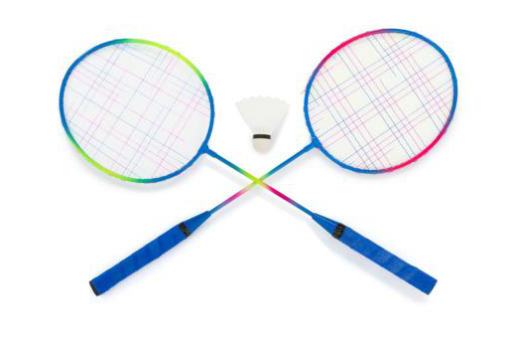

In [40]:
# Accessing and visualizing an image
badminton_image_path = os.path.join(train_badminton_dir, '00000011.jpeg')
badminton_image = mpimg.imread(badminton_image_path)
plt.imshow(badminton_image)
plt.axis('off')

(-0.5, 499.5, 280.5, -0.5)

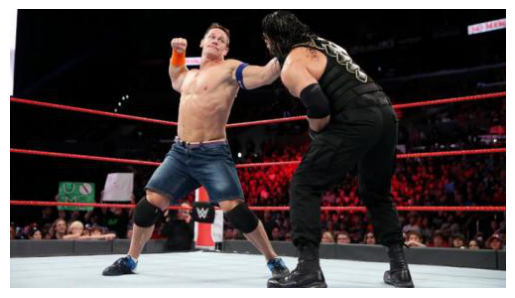

In [41]:
# Accessing and visualizing an image
wwe_image_path = os.path.join(train_wwe_dir, '00000001.jpg')
wwe_image = mpimg.imread(wwe_image_path)
plt.imshow(wwe_image)
plt.axis('off')

(-0.5, 499.5, 335.5, -0.5)

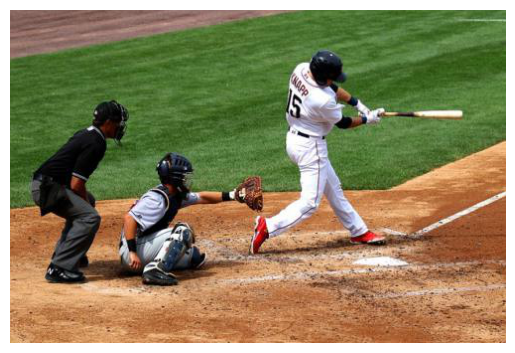

In [42]:
# Accessing and visualizing a dog image
baseball_image_path = os.path.join(train_baseball_dir, '00000000.jpg')
baseball_image = mpimg.imread(baseball_image_path)
plt.imshow(baseball_image)
plt.axis('off')

In [43]:
print(badminton_image_path)
print(baseball_image_path)
print(wwe_image_path)

sports1\train\badminton\00000011.jpeg
sports1\train\baseball\00000000.jpg
sports1\train\wwe\00000001.jpg


In [44]:
sports = ['badminton', 'baseball', 'basketball', 'boxing', 'chess', 
          'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 
          'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 
          'swimming', 'tennis', 'table_tennis', 'volleyball', 
          'weight_lifting', 'wrestling', 'wwe']


In [48]:
# Creating paths to 5 images for all sports
badminton_images = os.listdir(train_badminton_dir)[:5]
baseball_images = os.listdir(train_baseball_dir)[:5]
basketball_images = os.listdir(train_basketball_dir)[:5]
chess_images = os.listdir(train_chess_dir)[:5]
cricket_images = os.listdir(train_cricket_dir)[:5]
fencing_images = os.listdir(train_fencing_dir)[:5]
football_images = os.listdir(train_football_dir)[:5]
formula1_images = os.listdir(train_formula1_dir)[:5]
gymnastics_images = os.listdir(train_gymnastics_dir)[:5]
hockey_images = os.listdir(train_hockey_dir)[:5]
icehockey_images = os.listdir(train_icehockey_dir)[:5]  # Corrected variable name
kabaddi_images = os.listdir(train_kabaddi_dir)[:5]
motogp_images = os.listdir(train_motogp_dir)[:5]
shooting_images = os.listdir(train_shooting_dir)[:5]
swimming_images = os.listdir(train_swimming_dir)[:5]
tennis_images = os.listdir(train_tennis_dir)[:5]
tabletennis_images = os.listdir(train_tabletennis_dir)[:5]  # Corrected variable name
volleyball_images = os.listdir(train_volleyball_dir)[:5]
weightlifting_images = os.listdir(train_weightlifting_dir)[:5]
wrestling_images = os.listdir(train_wrestling_dir)[:5]
wwe_images = os.listdir(train_wwe_dir)[:5]

badminton_image_paths = [os.path.join(train_badminton_dir, image) for image in badminton_images]  # Corrected variable name
baseball_image_paths = [os.path.join(train_baseball_dir, image) for image in baseball_images]
basketball_image_paths = [os.path.join(train_basketball_dir, image) for image in basketball_images]
chess_image_paths = [os.path.join(train_chess_dir, image) for image in chess_images]
cricket_image_paths = [os.path.join(train_cricket_dir, image) for image in cricket_images]
fencing_image_paths = [os.path.join(train_fencing_dir, image) for image in fencing_images]
football_image_paths = [os.path.join(train_football_dir, image) for image in football_images]
formula1_image_paths = [os.path.join(train_formula1_dir, image) for image in formula1_images]
gymnastics_image_paths = [os.path.join(train_gymnastics_dir, image) for image in gymnastics_images]
hockey_image_paths = [os.path.join(train_hockey_dir, image) for image in hockey_images]
icehockey_image_paths = [os.path.join(train_icehockey_dir, image) for image in icehockey_images]
kabaddi_image_paths = [os.path.join(train_kabaddi_dir, image) for image in kabaddi_images]
motogp_image_paths = [os.path.join(train_motogp_dir, image) for image in motogp_images]
shooting_image_paths = [os.path.join(train_shooting_dir, image) for image in shooting_images]
swimming_image_paths = [os.path.join(train_swimming_dir, image) for image in swimming_images]
tennis_image_paths = [os.path.join(train_tennis_dir, image) for image in tennis_images]
tabletennis_image_paths = [os.path.join(train_tabletennis_dir, image) for image in tabletennis_images]
volleyball_image_paths = [os.path.join(train_volleyball_dir, image) for image in volleyball_images]
weightlifting_image_paths = [os.path.join(train_weightlifting_dir, image) for image in weightlifting_images]
wrestling_image_paths = [os.path.join(train_wrestling_dir, image) for image in wrestling_images]
wwe_image_paths = [os.path.join(train_wwe_dir, image) for image in wwe_images]

image_paths = badminton_image_paths + baseball_image_paths + basketball_image_paths + \
              chess_image_paths + cricket_image_paths + fencing_image_paths + \
              football_image_paths + formula1_image_paths + gymnastics_image_paths + \
              hockey_image_paths + icehockey_image_paths + kabaddi_image_paths + \
              motogp_image_paths + shooting_image_paths + swimming_image_paths + \
              tennis_image_paths + tabletennis_image_paths + volleyball_image_paths + \
              weightlifting_image_paths + wrestling_image_paths + wwe_image_paths

print(len(image_paths))


100


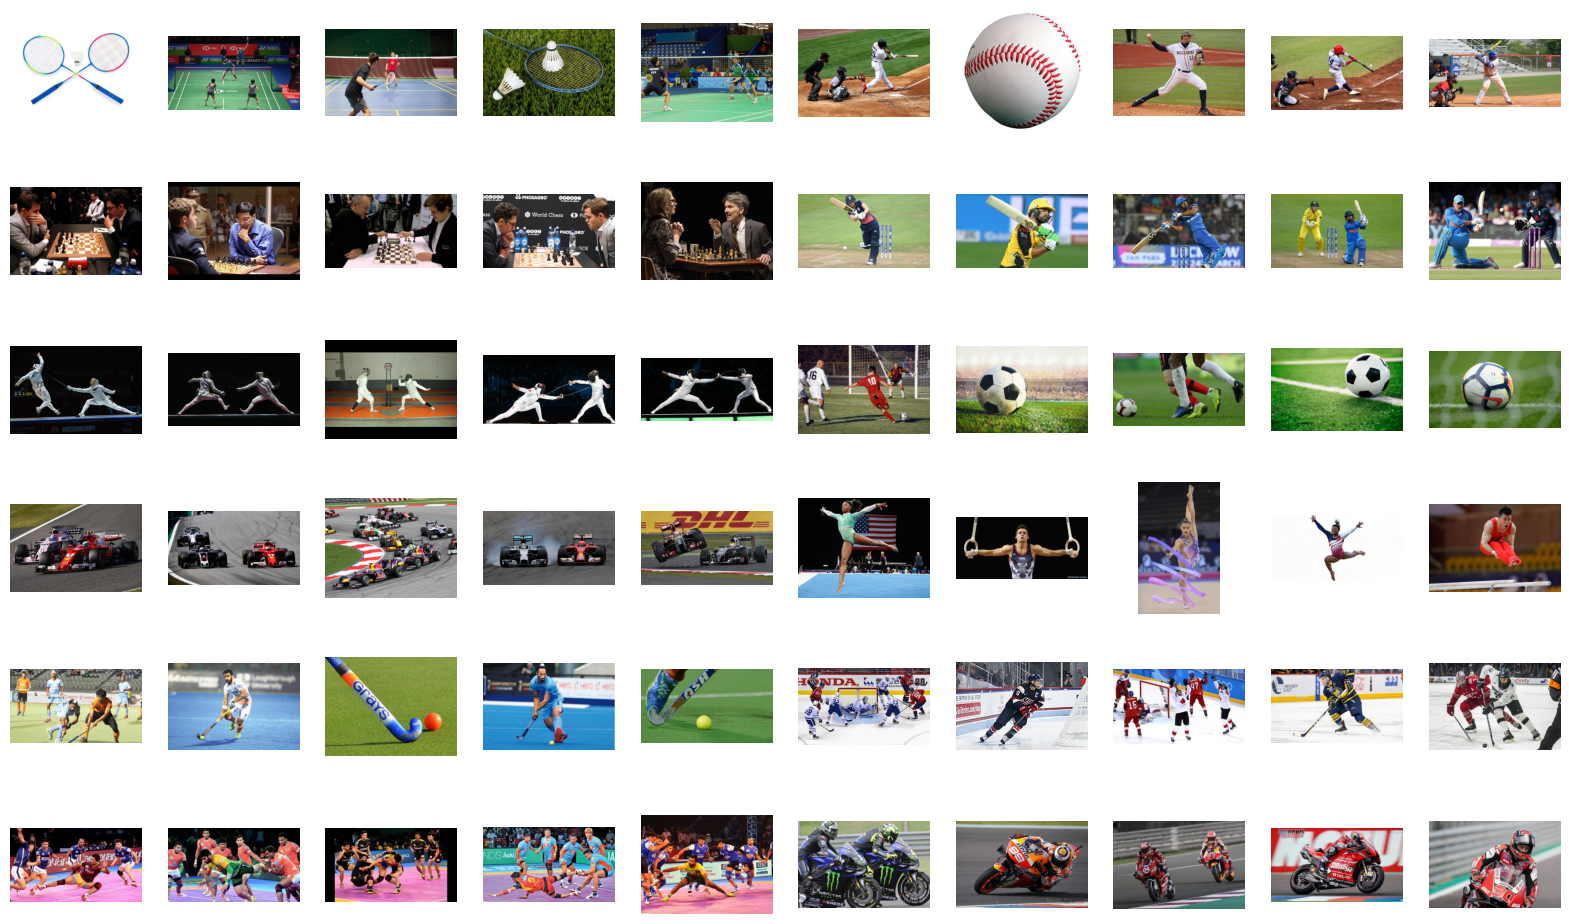

In [49]:
plt.figure(figsize = (20,12))
for i in range(60):
  plt.subplot(6,10,i+1)
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)
  plt.axis('off')

In [50]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

# Flow from directory is used when the data is on secondary storage
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 50,
    target_size = (200,200),
    class_mode = 'binary'
)

Found 13527 images belonging to 22 classes.
